[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/moshi4/pyMSAviz/blob/main/docs/getting_started.ipynb)

In [1]:
# Colab environment may require 'RESTART RUNTIME' to activate newly installed packages.
# %pip install pymsaviz 

## 1. Simple Visualization

- Create `MsaViz` class instance from MSA file
- Plot figure by `plotfig` method

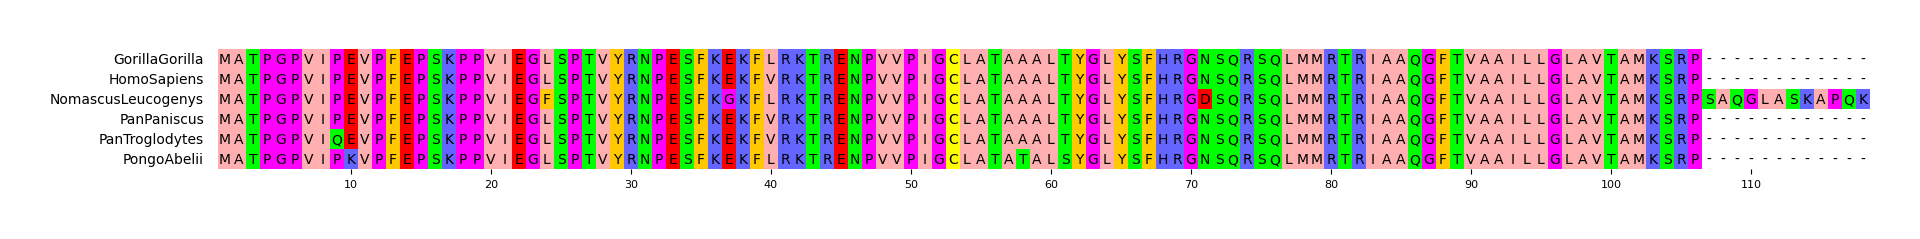

In [2]:
from pymsaviz import MsaViz, get_msa_testdata

msa_file = get_msa_testdata("HIGD2A.fa")
mv = MsaViz(msa_file)
fig = mv.plotfig()  # If save figure, use savefig method [e.g. mv.savefig("result.png")]

- Wrap style MSA visualization (`wrap_length=60`)
- Change color scheme (`color_scheme='Flower'`)

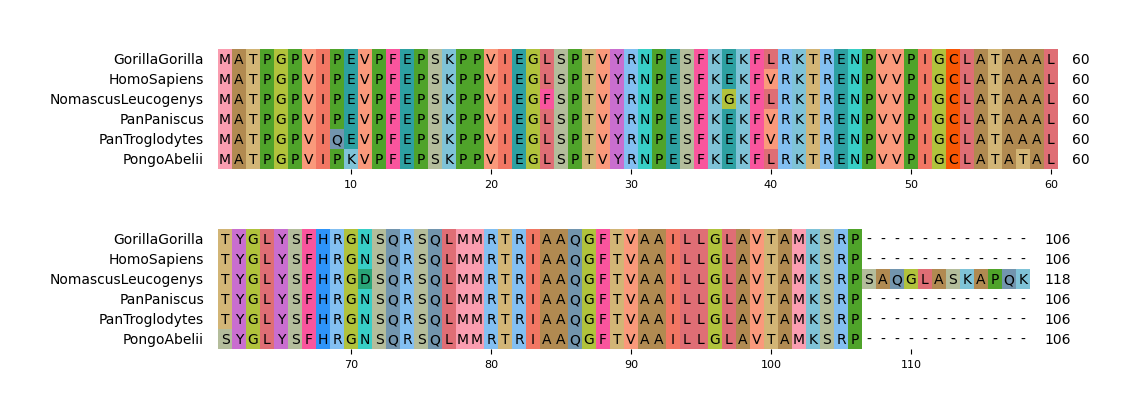

In [3]:
from pymsaviz import MsaViz, get_msa_testdata

msa_file = get_msa_testdata("HIGD2A.fa")
mv = MsaViz(msa_file, wrap_length=60, color_scheme="Flower", show_count=True)
fig = mv.plotfig()

- Show grid (`show_grid=True`)
- Show consensus sequence & identity bar (`show_consensus=True`)

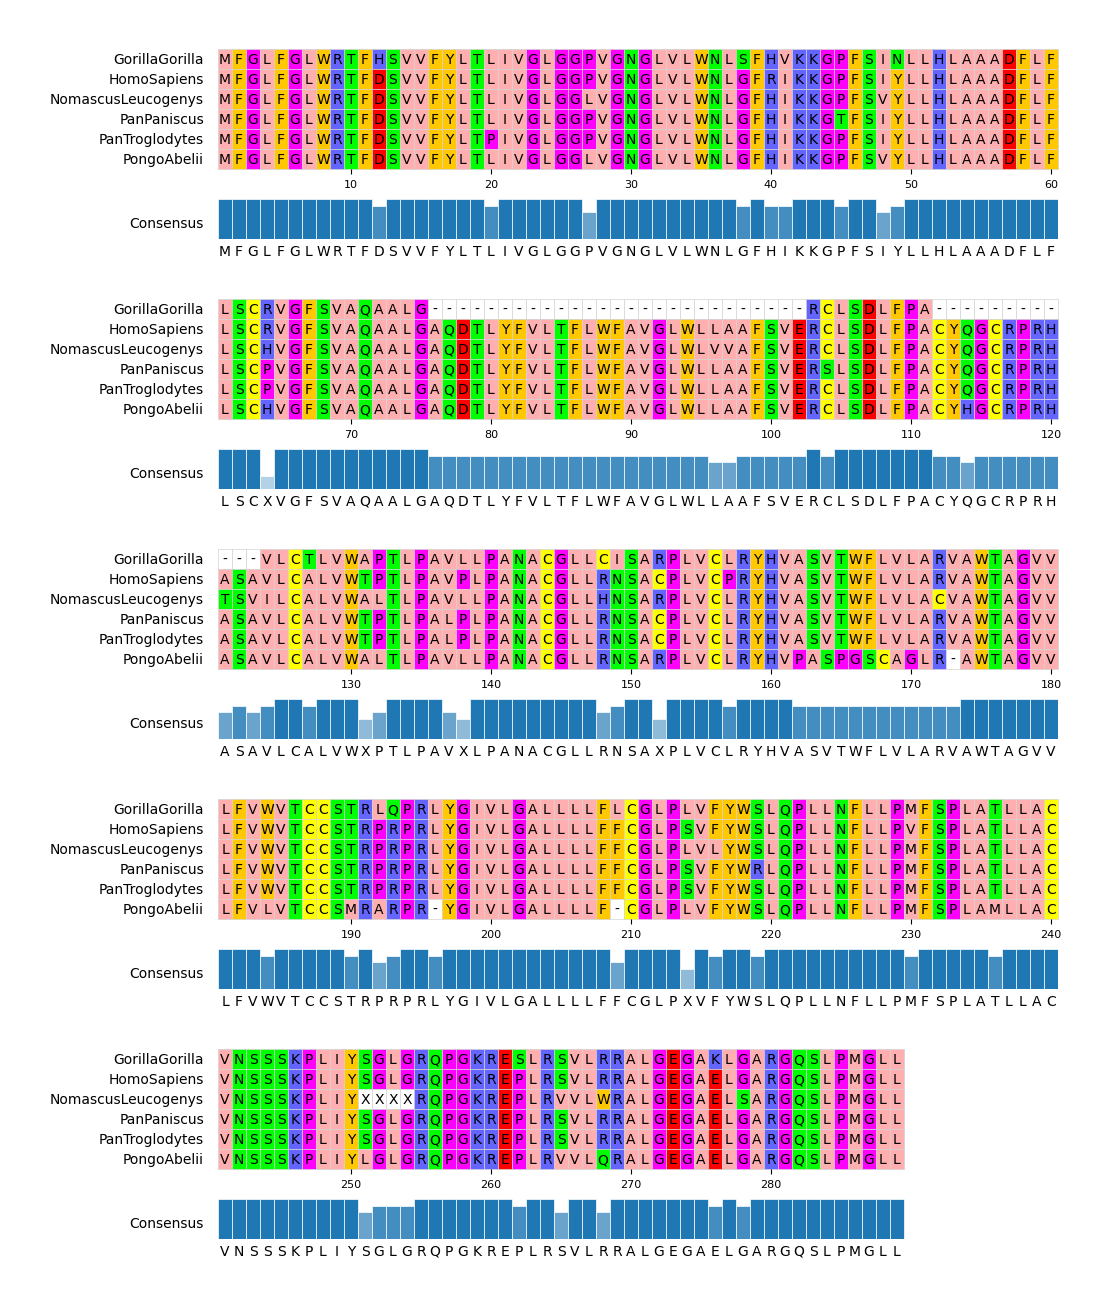

In [4]:
from pymsaviz import MsaViz, get_msa_testdata

msa_file = get_msa_testdata("MRGPRG.fa")
mv = MsaViz(msa_file, wrap_length=60, show_grid=True, show_consensus=True)
fig = mv.plotfig()

- Limit MSA visualization start-end range (`start=100, end=160`)
- No display MSA characters (`show_seq_char=False`)

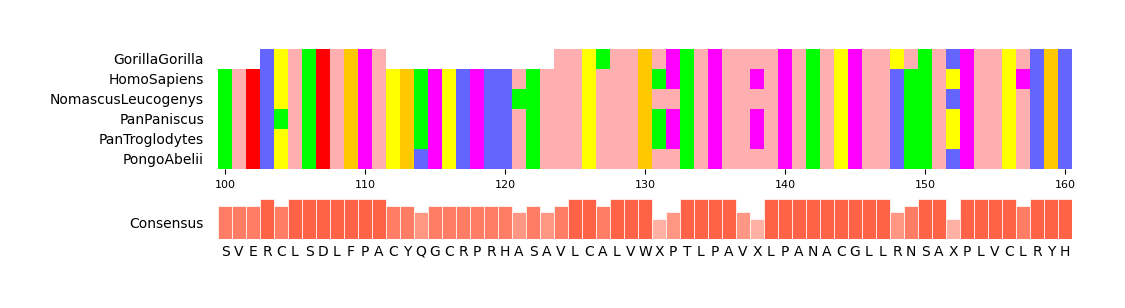

In [5]:
from pymsaviz import MsaViz, get_msa_testdata

msa_file = get_msa_testdata("MRGPRG.fa")
mv = MsaViz(msa_file, start=100, end=160, show_seq_char=False, show_consensus=True, consensus_color="tomato")
fig = mv.plotfig()

## 2. Customized Visualization

- Set user-defined custom color scheme by `set_custom_color_scheme` method

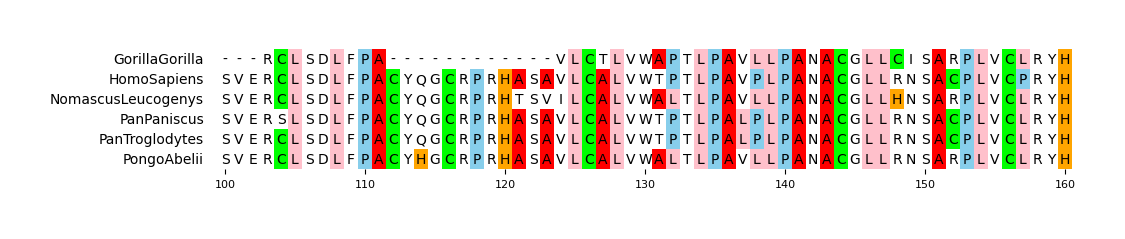

In [6]:
from pymsaviz import MsaViz, get_msa_testdata

msa_file = get_msa_testdata("MRGPRG.fa")
mv = MsaViz(msa_file, start=100, end=160)
mv.set_custom_color_scheme({"A": "red", "P": "skyblue", "C": "lime", "H": "orange", "L": "pink"})
fig = mv.plotfig()

- Set user-defined highlight position by `set_highlight_pos` method

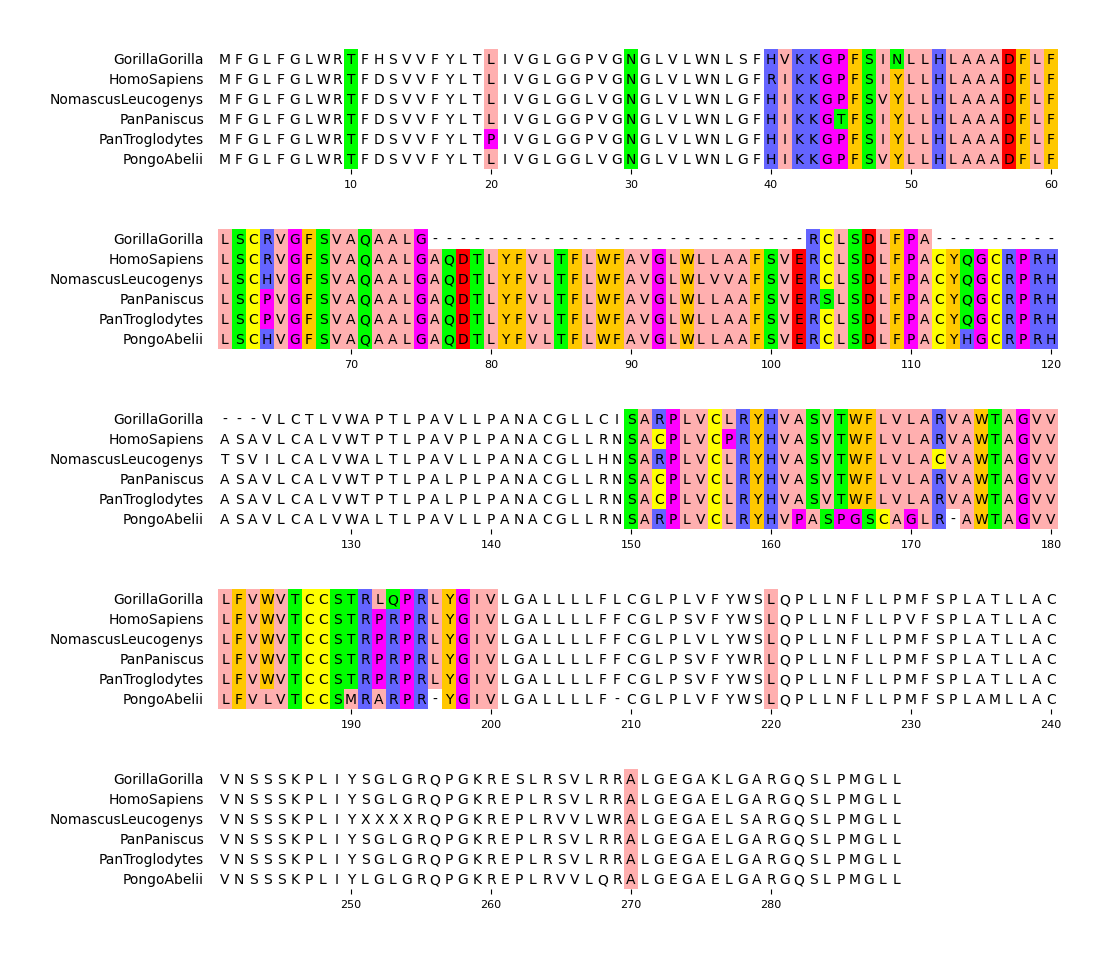

In [7]:
from pymsaviz import MsaViz, get_msa_testdata

msa_file = get_msa_testdata("MRGPRG.fa")
mv = MsaViz(msa_file, wrap_length=60)
mv.set_highlight_pos([10, 20, 30, (40, 120), (150, 200), 220, 270])
fig = mv.plotfig()

- Set highlight position by consensus identity threshold using `set_highlight_pos_by_identity_thr` method

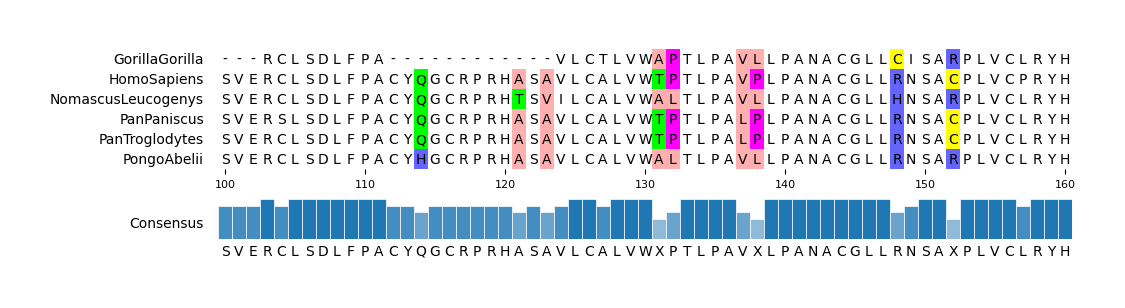

In [8]:
from pymsaviz import MsaViz, get_msa_testdata

msa_file = get_msa_testdata("MRGPRG.fa")
mv = MsaViz(msa_file, start=100, end=160, show_consensus=True)
# Only highlight 0 - 80 [%] consensus identity positions
mv.set_highlight_pos_by_ident_thr(min_thr=0, max_thr=80)
fig = mv.plotfig()

- Add markers by `add_markers` method
- Add text annotation by `add_text_annotation` method

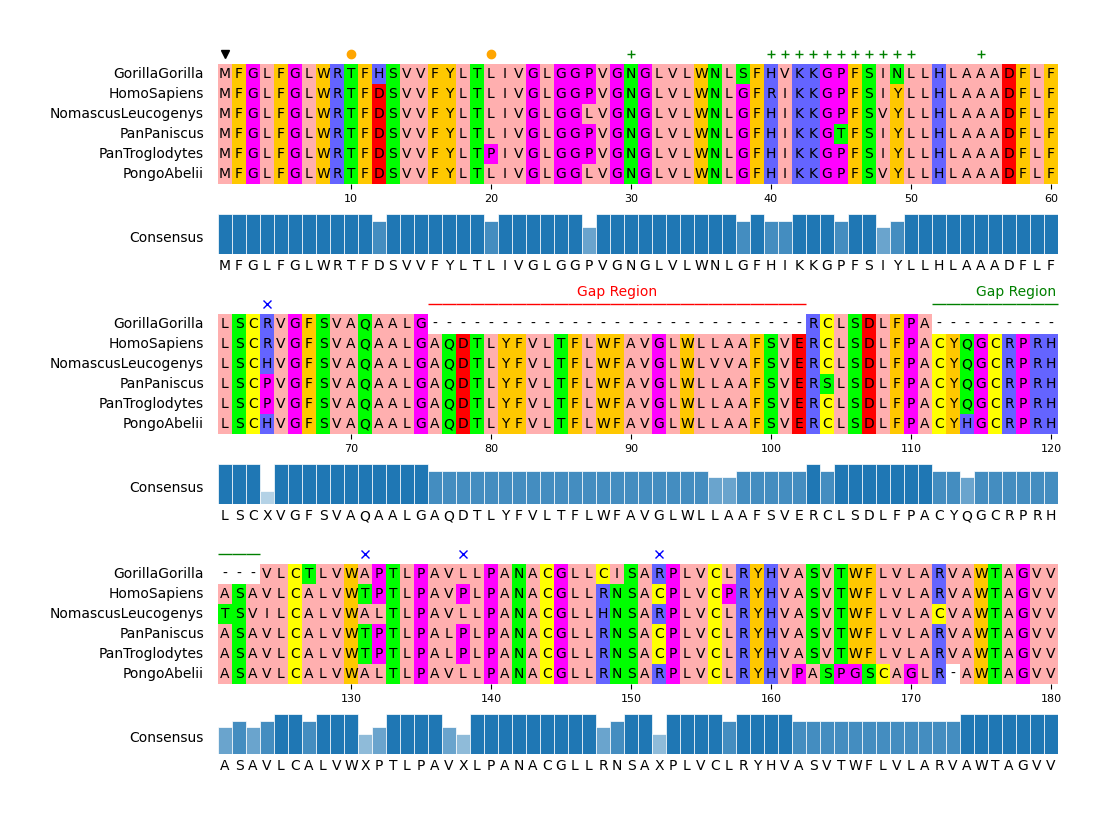

In [9]:
from pymsaviz import MsaViz, get_msa_testdata

msa_file = get_msa_testdata("MRGPRG.fa")
mv = MsaViz(msa_file, start=1, end=180, wrap_length=60, show_consensus=True)

# Extract MSA positions less than 50% consensus identity
pos_ident_less_than_50 = []
ident_list = mv._get_consensus_identity_list()
for pos, ident in enumerate(ident_list, 1):
    if ident <= 50:
        pos_ident_less_than_50.append(pos)

# Add markers
mv.add_markers([1])
mv.add_markers([10, 20], color="orange", marker="o")
mv.add_markers([30, (40, 50), 55], color="green", marker="+")
mv.add_markers(pos_ident_less_than_50, marker="x", color="blue")
# Add text annotations
mv.add_text_annotation((76, 102), "Gap Region", text_color="red", range_color="red")
mv.add_text_annotation((112, 123), "Gap Region", text_color="green", range_color="green")

fig = mv.plotfig()

- Marker list (https://matplotlib.org/stable/api/markers_api.html)

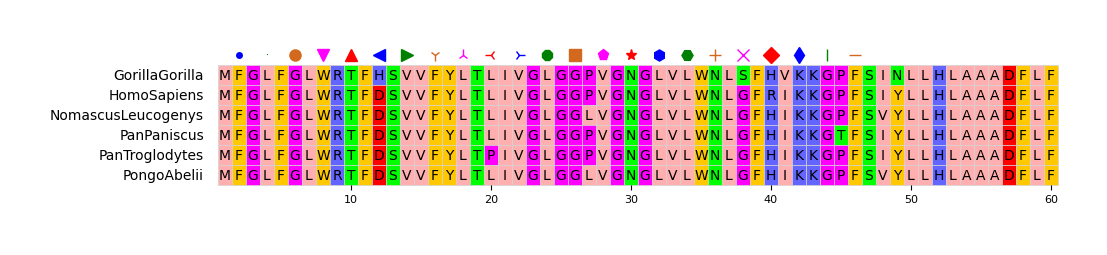

In [10]:
from pymsaviz import MsaViz, get_msa_testdata

msa_file = get_msa_testdata("MRGPRG.fa")
mv = MsaViz(msa_file, end=60, show_grid=True)

# Add various type markers
markers = [".", ",", "o", "v", "^", "<", ">", "1", "2", "3", "4", "8", "s", "p", "*", "h", "H", "+", "x", "D", "d", "|", "_"]
colors = ["red", "blue", "green", "chocolate", "magenta"]
for idx, marker in enumerate(markers, 1):
    color = colors[idx % len(colors)]
    mv.add_markers([idx * 2], marker=marker, color=color, size=8)
fig = mv.plotfig()

Change detail plot parameters by `set_plot_params` method
- `ticks_interval=5` (Default: 10)
- `x_unit_size_ratio=1.0` (Default: 0.7)
- `grid_color="black"` (Default: "lightgrey")

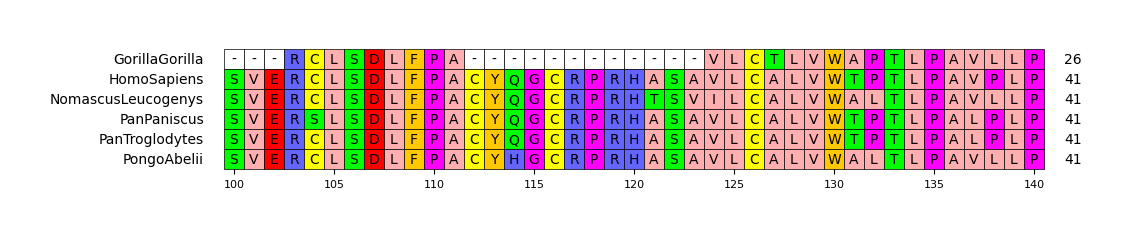

In [11]:
from pymsaviz import MsaViz, get_msa_testdata

msa_file = get_msa_testdata("MRGPRG.fa")
mv = MsaViz(msa_file, start=100 ,end=140, show_grid=True, show_count=True)
mv.set_plot_params(ticks_interval=5, x_unit_size_ratio=1.0, grid_color="black")
fig = mv.plotfig()

Color block MSA display

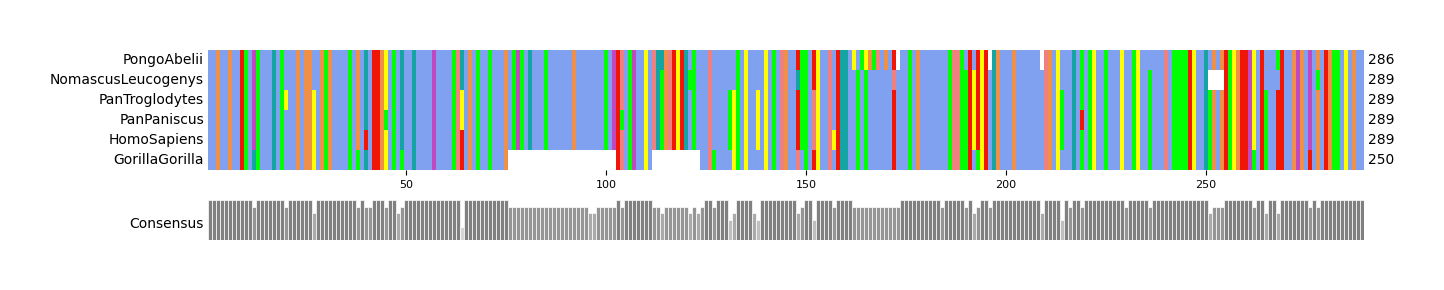

In [12]:
from pymsaviz import MsaViz, get_msa_testdata

msa_file = get_msa_testdata("MRGPRG.fa")
mv = MsaViz(msa_file, color_scheme="Clustal", show_seq_char=False, show_count=True, sort=True, show_consensus=True, consensus_color="grey")
mv.set_plot_params(ticks_interval=50, x_unit_size_ratio=0.2, show_consensus_char=False)
fig = mv.plotfig()